In [1]:
#For testing, import the user name
from env import api_key
import requests
import pandas as pd
from bs4 import BeautifulSoup
from env import api_key
from time import sleep
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import os
from acquire import *
from prepare import *
from model import *

pd.set_option("display.max_rows", None, "display.max_columns", None)

pd.reset_option("display.max_rows", "display.max_columns")

import re

In [2]:
df_10 = pd.read_csv('final_10.csv')

In [3]:
df_10.drop(columns = ['Unnamed: 0'],inplace = True)

In [4]:
df = df_10

In [5]:
train,test = prepare(df)

In [6]:
train['BlueTeamLevelDifference'] = train.BlueTeamLevel - train.RedTeamLevel

In [7]:
train['BlueTeamLevelDifference'] = train.BlueTeamLevel - train.RedTeamLevel
train['BlueTeamXpDifference'] = train.BlueTeamXp - train.RedTeamXp
train['BlueTeamWardDifference'] = train.BlueTeamWards - train.RedTeamWards
train['blueteam_win'] = train['winningTeam'] == 100

In [8]:
train['BlueTeamXpDifference'] = train.BlueTeamXp - train.RedTeamXp

In [9]:
train['BlueTeamWardDifference'] = train.BlueTeamWards - train.RedTeamWards

In [10]:
train['BlueTeamWin'] = train['winningTeam'] == 100

In [11]:
train.head(1)

BlueTeamAirDragon  BlueTopAssists  RedSupportAssists  BlueJungleAssists  \
3513                0.0             1.0                0.0                1.0   

      BlueMidAssists  BlueADCAssists  BlueSupportAssists  RedTopAssists  \
3513             1.0             4.0                 2.0            1.0   

      RedJungleAssists  RedMidAssists  RedADCAssists  BlueTeamBarons  \
3513               0.0            0.0            1.0             0.0   

      BlueTeamChemtechDragon  BlueTopCurrentGold  RedSupportCurrentGold  \
3513                     0.0              1109.0                  209.0   

      BlueJungleCurrentGold  BlueMidCurrentGold  BlueADCCurrentGold  \
3513                 1601.0               249.0               725.0   

      BlueSupportCurrentGold  RedTopCurrentGold  RedJungleCurrentGold  \
3513                   939.0              759.0                 159.0   

      RedMidCurrentGold  RedADCCurrentGold  BlueTopDeaths  RedSupportDeaths  \
3513             2862.0              753.0            1.0               3.0   

      BlueJungleDeaths  BlueMidDeaths  BlueADCDeaths  BlueSupportDeaths  \
3513               0.0            1.0            1.0                1.0   

      RedTopDeaths  RedJungleDeaths  RedMidDeaths  RedADCDeaths  \
3513           1.0              2.0           1.0           1.0   

      BlueTeamDragons  RedTeamDragons  BlueTeamEarthDragon  \
3513              1.0             0.0                  0.0   

      RedTeamEarthDragon  BlueTeamFireDragon  RedTeamFireDragon  gameDuration  \
3513                 0.0                 1.0                0.0          2168   

      gameEndTimestamp      gameId gameMode                      gameName  \
3513     1637224740422  4107781904  CLASSIC  teambuilder-match-4107781904   

      gameStartTimestamp      gameType    gameVersion  BlueTopgoldPerSecond  \
3513       1637222572040  MATCHED_GAME  11.23.409.111                   0.0   

      RedSupportgoldPerSecond  BlueJunglegoldPerSecond  BlueMidgoldPerSecond  \
3513                      0.0                      0.0                   0.0   

      BlueADCgoldPerSecond  BlueSupportgoldPerSecond  RedTopgoldPerSecond  \
3513                   0.0                      30.0                 20.0   

      RedJunglegoldPerSecond  RedMidgoldPerSecond  RedADCgoldPerSecond  \
3513                     0.0                  0.0                  0.0   

      BlueTeamHextechDragonDragon  RedTeamHextechDragonDragon  \
3513                          0.0                         0.0   

      RedTeamInhibsLost  BlueTopJungleMinionsKilled  \
3513                0.0                        54.0   

      RedSupportJungleMinionsKilled  BlueJungleJungleMinionsKilled  \
3513                           44.0                            0.0   

      BlueMidJungleMinionsKilled  BlueADCJungleMinionsKilled  \
3513                         0.0                         0.0   

      BlueSupportJungleMinionsKilled  RedTopJungleMinionsKilled  \
3513                             0.0                        0.0   

      RedJungleJungleMinionsKilled  RedMidJungleMinionsKilled  \
3513                           0.0                        0.0   

      RedADCJungleMinionsKilled  BlueTopKills  RedSupportKills  \
3513                        0.0           2.0              2.0   

      BlueJungleKills  BlueMidKills  BlueADCKills  BlueSupportKills  \
3513              2.0           2.0           1.0               1.0   

      RedTopKills  RedJungleKills  RedMidKills  RedADCKills  BlueTopLevel  \
3513          0.0             1.0          1.0          0.0           7.0   

      RedSupportLevel  BlueJungleLevel  BlueMidLevel  BlueADCLevel  \
3513              6.0              7.0           8.0           7.0   

      BlueSupportLevel  RedTopLevel  RedJungleLevel  RedMidLevel  RedADCLevel  \
3513               7.0          4.0             7.0          8.0          5.0   

      BlueTopMagicDamageDoneToChampions  RedSupportMagicDamageDoneToChampions  \


train = train[['BlueTeamWin',
              'chemtechdragon_team100',
             'dragon_team100',
             'BlueTeamDeathDifference',
             'dragon_team100',
             'dragon_team200',
             'earthdragon_team100',
             'earthdragon_team200',
             'firedragon_team100',
             'firedragon_team200',
             'gameDuration',
             'hextechdragon_team100',
             'hextechdragon_team200',
              'BlueTeamMonsterKillDifference',
              'RedTeamMonstersKilled',
              'BlueTeamMonstersKilled',
              'BlueTeamDeathDifference',
              'waterdragon_team100',
              'chemtechdragon_team200',
              'riftherald_team200',
              'airdragon_team200',
              'waterdragon_team200',
              'BlueTeamDeaths',
              'RedTeamDeaths',
              'BlueTeamKills',
              'RedTeamKills',
              'BlueTeamMagicDamageDoneToChampions',
              'RedTeamMagicDamageDoneToChampions',
              'BlueTeamMinionsKilled',
              'RedTeamMinionsKilled',
              'BlueTeamPhysicalDamageDoneToChampions',
              'RedTeamPhysicalDamageDoneToChampions',
              'BlueTeamTimeEnemySpentControlled',
              'RedTeamTimeEnemySpentControlled',
              'BlueTeamTotalDamageDoneToChampions',
              'RedTeamTotalDamageDoneToChampions',
              'BlueTeamTotalGold',
              'RedTeamTotalGold',
              'BlueTeamTrueDamageDoneToChampions',
              'RedTeamTrueDamageDoneToChampions',
              'BlueTeamWards',
              'RedTeamWards',
              'BlueTeamAssists',
              'RedTeamAssists',
              'BlueTeamXp',
              'RedTeamXp',
              'BlueTeamTotalGoldDifference',
              'BlueTeamMVPKills',
              'BlueTeamLevelDifference',
              'BlueTeamXpDifference',
              'blueteam_win']]

In [12]:
train

BlueTeamAirDragon  BlueTopAssists  RedSupportAssists  BlueJungleAssists  \
3513                0.0             1.0                0.0                1.0   
1250                0.0             1.0                0.0                0.0   
3532                0.0             1.0                1.0                1.0   
3858                0.0             1.0                6.0                3.0   
528                 0.0             1.0                2.0                2.0   
...                 ...             ...                ...                ...   
1593                0.0             3.0                2.0                1.0   
4060                0.0             2.0                5.0                1.0   
1346                0.0             2.0                2.0                2.0   
3454                0.0             0.0                0.0                1.0   
3582                0.0             0.0                1.0                1.0   

      BlueMidAssists  BlueADCAssists  BlueSupportAssists  RedTopAssists  \
3513             1.0             4.0                 2.0            1.0   
1250             3.0             0.0                 5.0            0.0   
3532             0.0             1.0                 2.0            1.0   
3858             1.0             0.0                 4.0            1.0   
528              2.0             3.0                 2.0            0.0   
...              ...             ...                 ...            ...   
1593             0.0             1.0                 5.0            0.0   
4060             0.0             1.0                 1.0            0.0   
1346             0.0             2.0                 2.0            4.0   
3454             0.0             2.0                 3.0            0.0   
3582             0.0             2.0                 2.0            1.0   

      RedJungleAssists  RedMidAssists  RedADCAssists  BlueTeamBarons  \
3513               0.0            0.0            1.0             0.0   
1250               3.0            0.0            2.0             0.0   
3532               1.0            0.0            0.0             0.0   
3858               0.0            0.0            4.0             0.0   
528                2.0            1.0            2.0             0.0   
...                ...            ...            ...             ...   
1593               2.0            1.0            2.0             0.0   
4060               6.0            2.0            0.0             0.0   
1346               0.0            2.0            1.0             0.0   
3454               1.0            0.0            2.0             0.0   
3582               0.0            2.0            1.0             0.0   

      BlueTeamChemtechDragon  BlueTopCurrentGold  RedSupportCurrentGold  \
3513                     0.0              1109.0                  209.0   
1250                     0.0               323.0                  537.0   
3532                     0.0              1863.0                  483.0   
3858                     0.0               251.0                  402.0   
528                      0.0               934.0                  353.0   
...                      ...                 ...                    ...   
1593                     0.0               410.0                  329.0   
4060                     0.0              1035.0                   55.0   
1346                     0.0               353.0                  118.0   
3454                     0.0               553.0                   48.0   
3582                     0.0               377.0                   52.0   

      BlueJungleCurrentGold  BlueMidCurrentGold  BlueADCCurrentGold  \
3513                 1601.0               249.0               725.0   
1250                 1160.0               242.0                96.0   
3532                   41.0               785.0               586.0   
3858                   39.0               142.0               621.0   
528        

In [13]:
btwin_train = train[train.blueteam_win == True]

1. Top
2. Jungle
3. Mid
4. Bot
5. Support
6. Top
7. Jungle
8. Mid
9. Bot
10. Support

In [14]:
rtwin_train = train[train.blueteam_win == False]

Text(0.5, 1.0, 'Features Correlation With gameDuration')

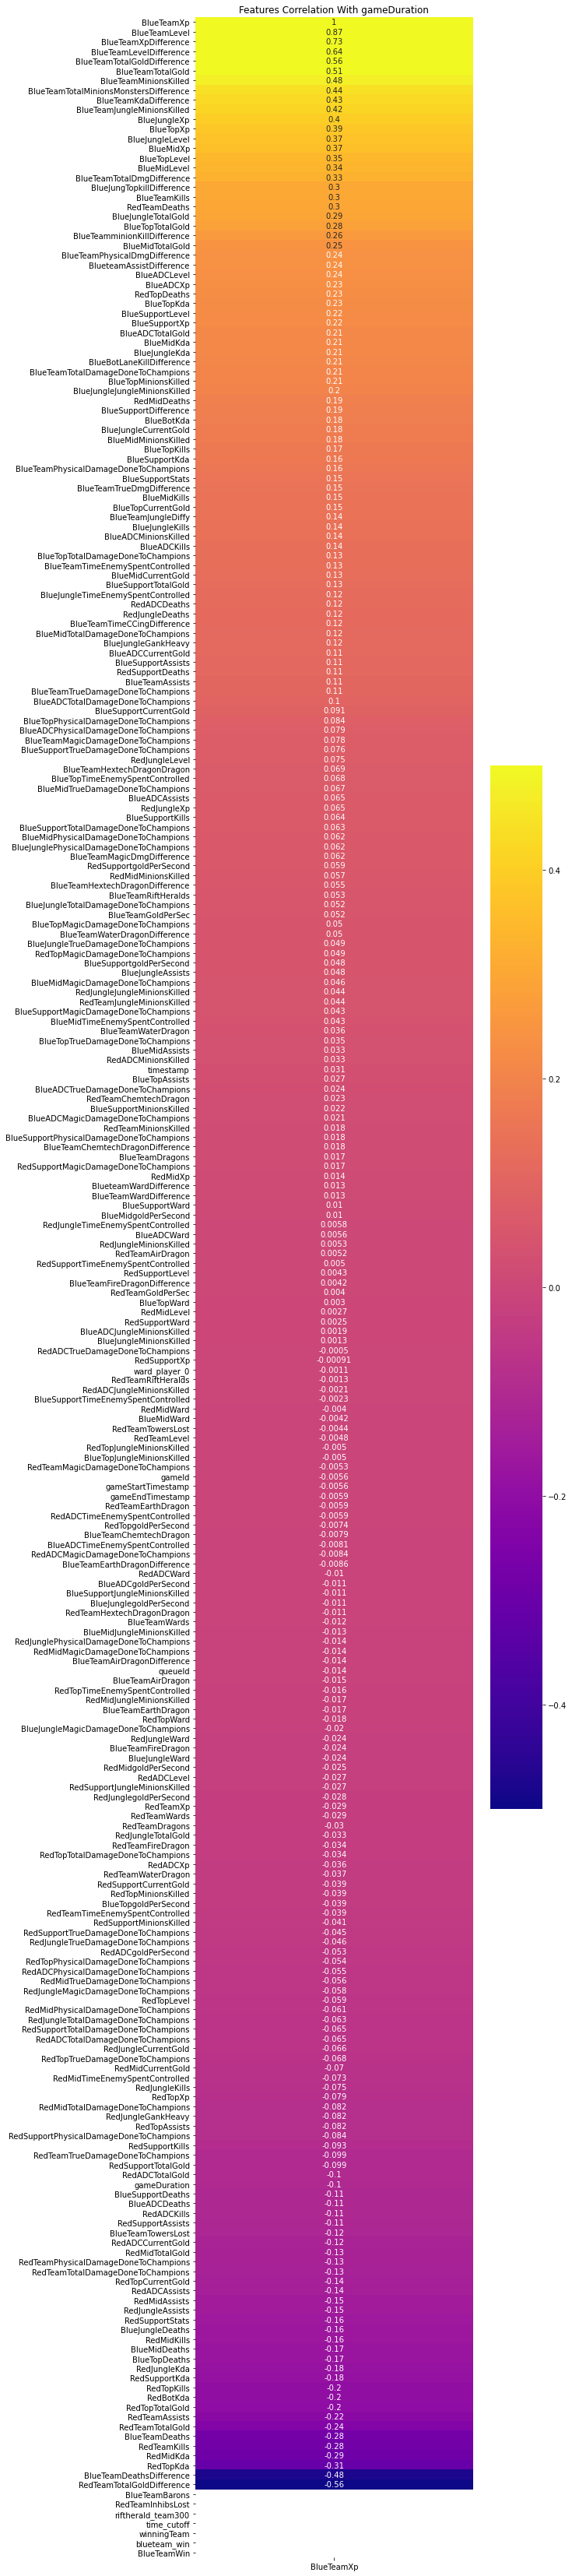

In [15]:
# redteamXP correlation when blue team wins
plt.figure(figsize = (8,60))
heatmap = sns.heatmap(btwin_train.corr()[['BlueTeamXp']].sort_values(by = 'BlueTeamXp',ascending = False),vmin = -.5,vmax = .5,annot = True, cmap = 'plasma')
heatmap.set_title('Features Correlation With gameDuration')

Text(0.5, 1.0, 'Features Correlation With gameDuration')

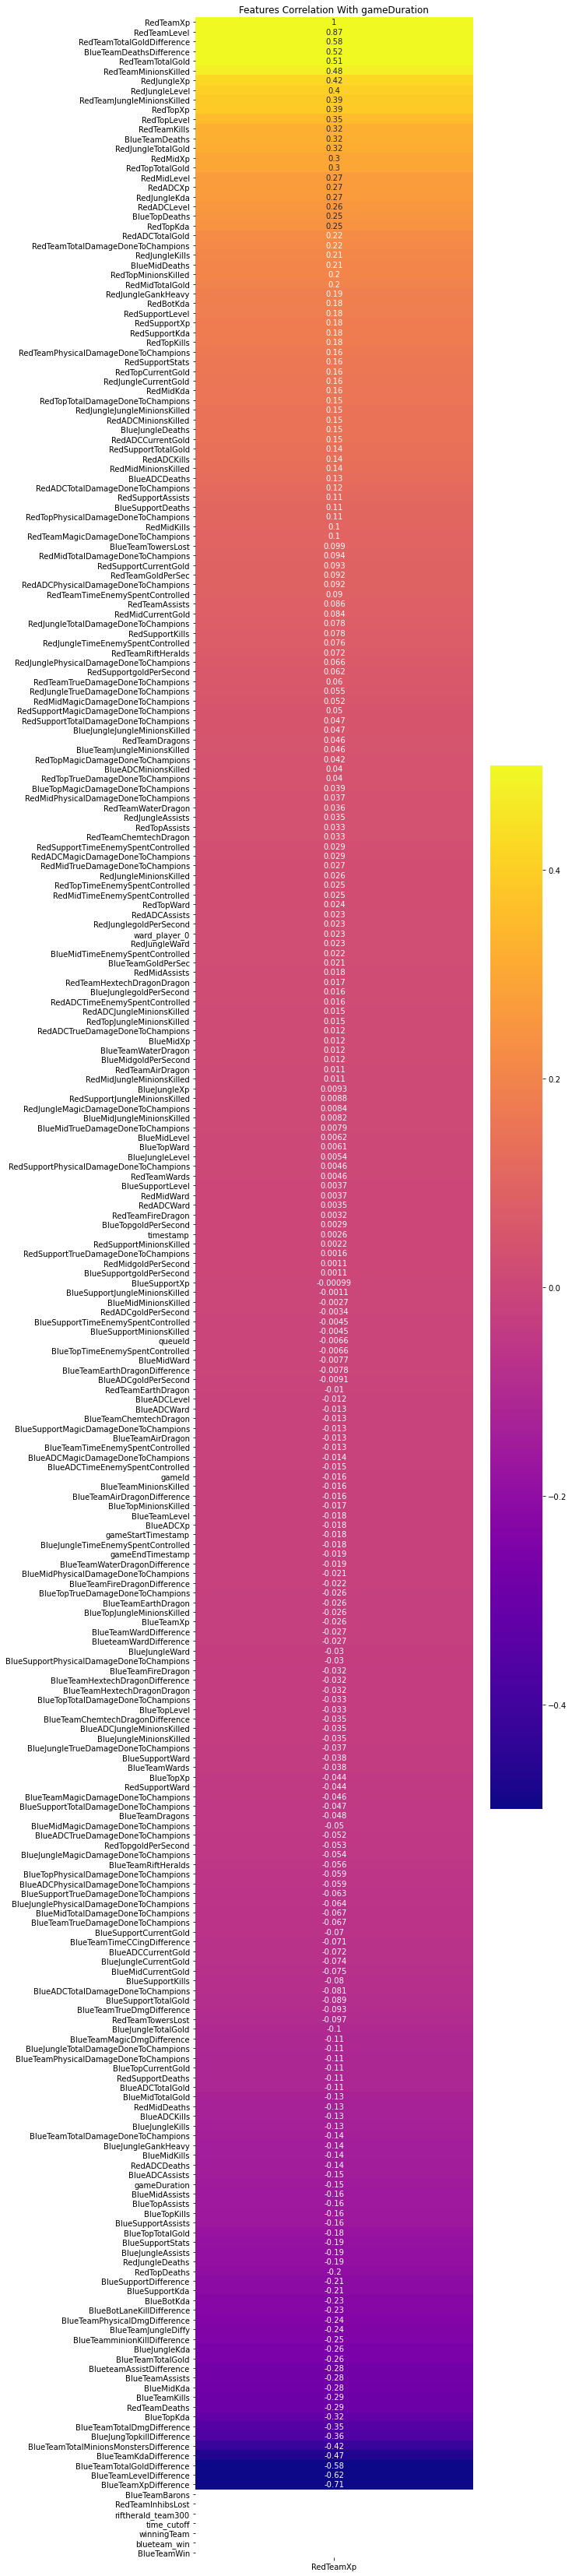

In [16]:
# redteamXP correlation when blue team wins
plt.figure(figsize = (8,60))
heatmap = sns.heatmap(rtwin_train.corr()[['RedTeamXp']].sort_values(by = 'RedTeamXp',ascending = False),vmin = -.5,vmax = .5,annot = True, cmap = 'plasma')
heatmap.set_title('Features Correlation With gameDuration')

Text(0.5, 1.0, 'Features Correlation With gameDuration')

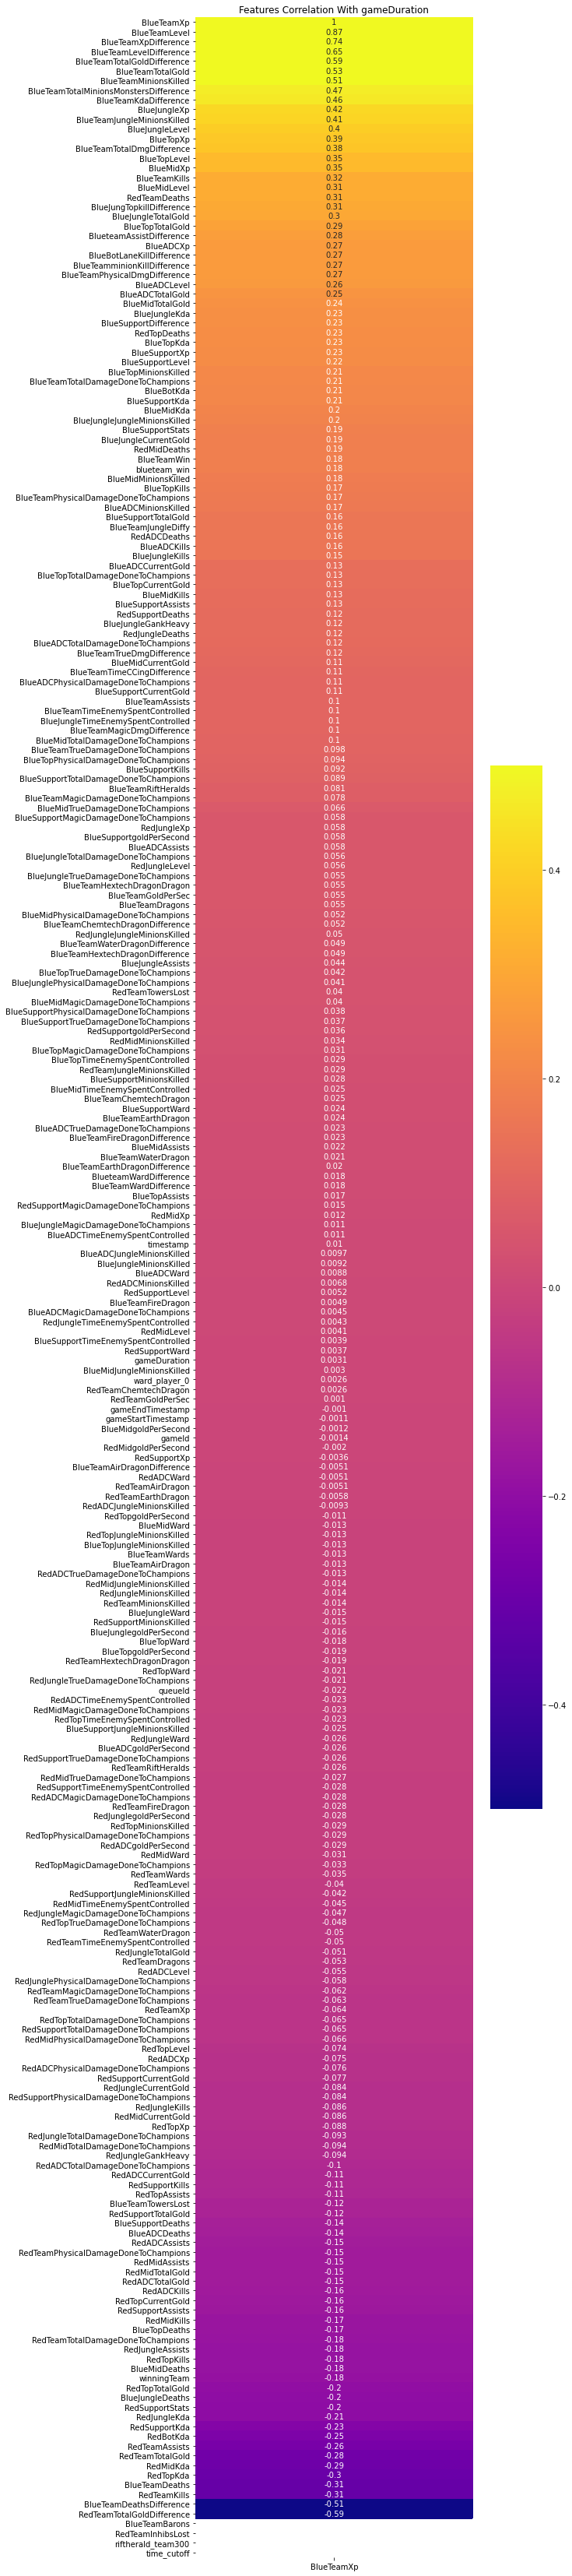

In [17]:
# blueteamXP correlation when blue team wins
plt.figure(figsize = (8,60))
heatmap = sns.heatmap(train.corr()[['BlueTeamXp']].sort_values(by = 'BlueTeamXp',ascending = False),vmin = -.5,vmax = .5,annot = True, cmap = 'plasma')
heatmap.set_title('Features Correlation With gameDuration')

Text(0.5, 1.0, 'Features Correlation With gameDuration')

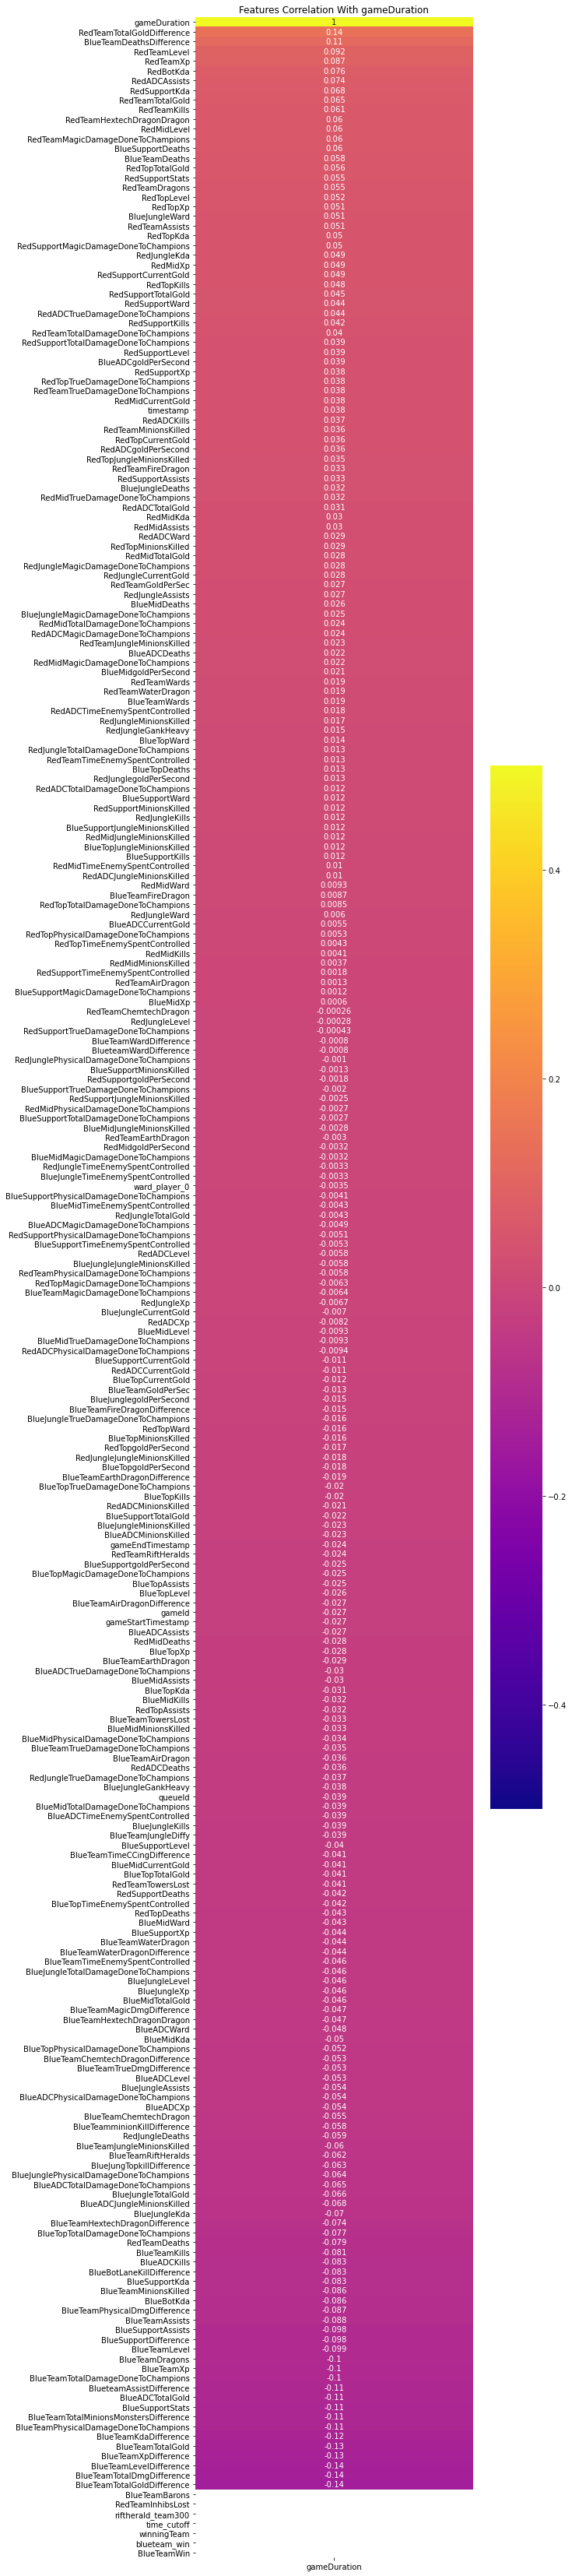

In [18]:
# Game duration correlation when blue team wins
plt.figure(figsize = (8,60))
heatmap = sns.heatmap(btwin_train.corr()[['gameDuration']].sort_values(by = 'gameDuration',ascending = False),vmin = -.5,vmax = .5,annot = True, cmap = 'plasma')
heatmap.set_title('Features Correlation With gameDuration')

Text(0.5, 1.0, 'Features Correlation With gameDuration')

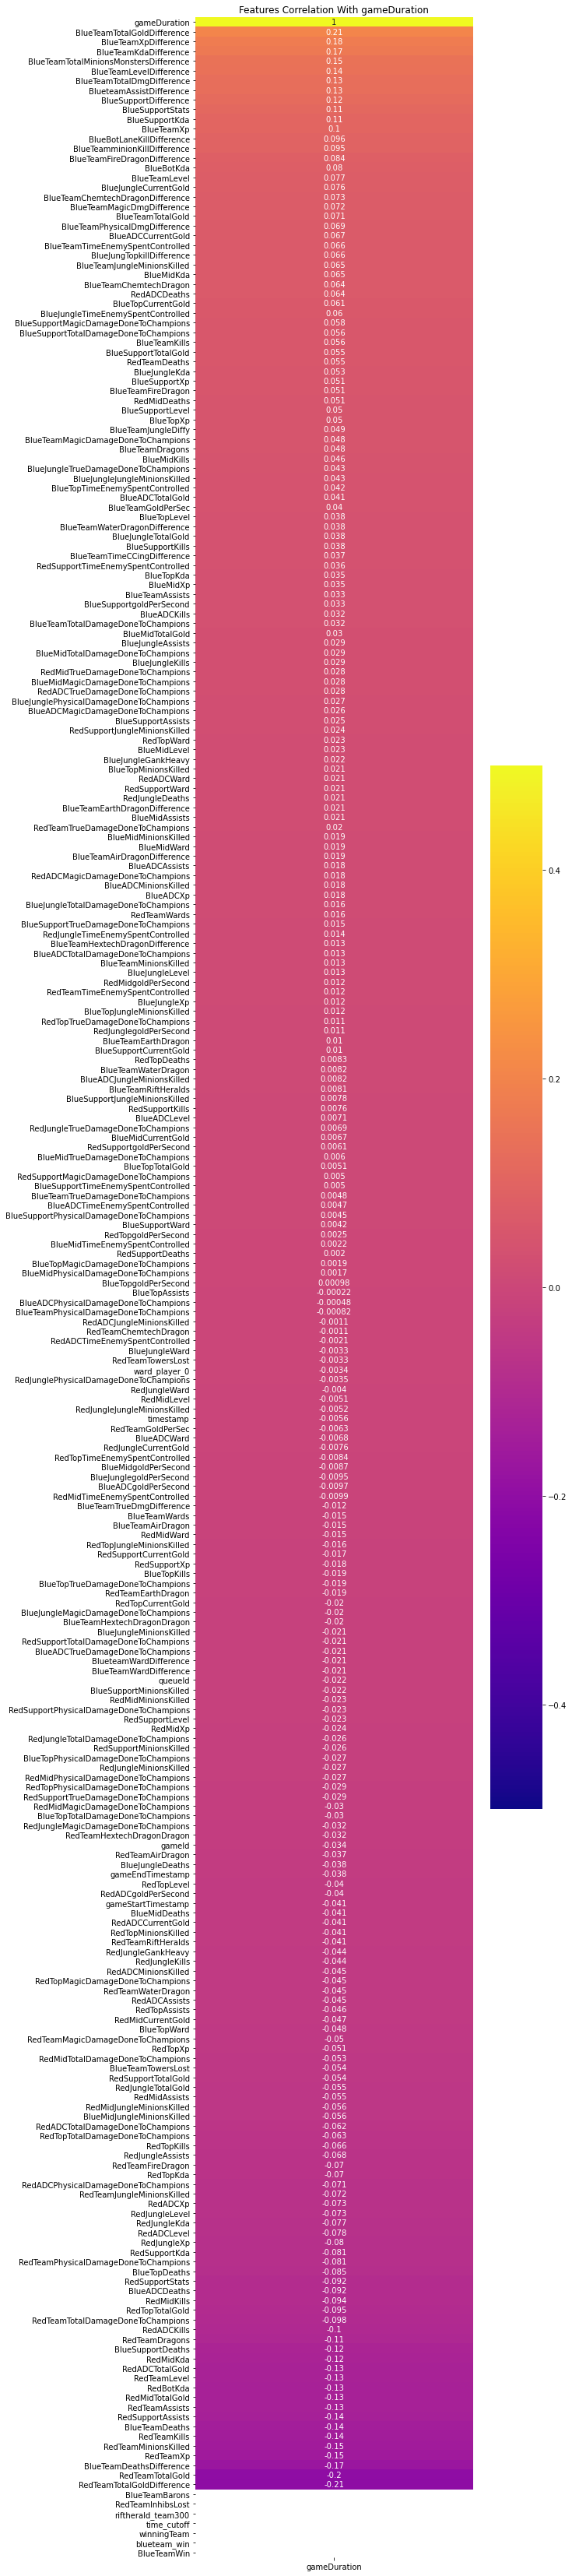

In [19]:
# Game duration correlation when red team wins
plt.figure(figsize = (8,60))
heatmap = sns.heatmap(rtwin_train.corr()[['gameDuration']].sort_values(by = 'gameDuration',ascending = False),vmin = -.5,vmax = .5,annot = True, cmap = 'plasma')
heatmap.set_title('Features Correlation With gameDuration')

Text(0.5, 1.0, 'Features Correlation With gameDuration')

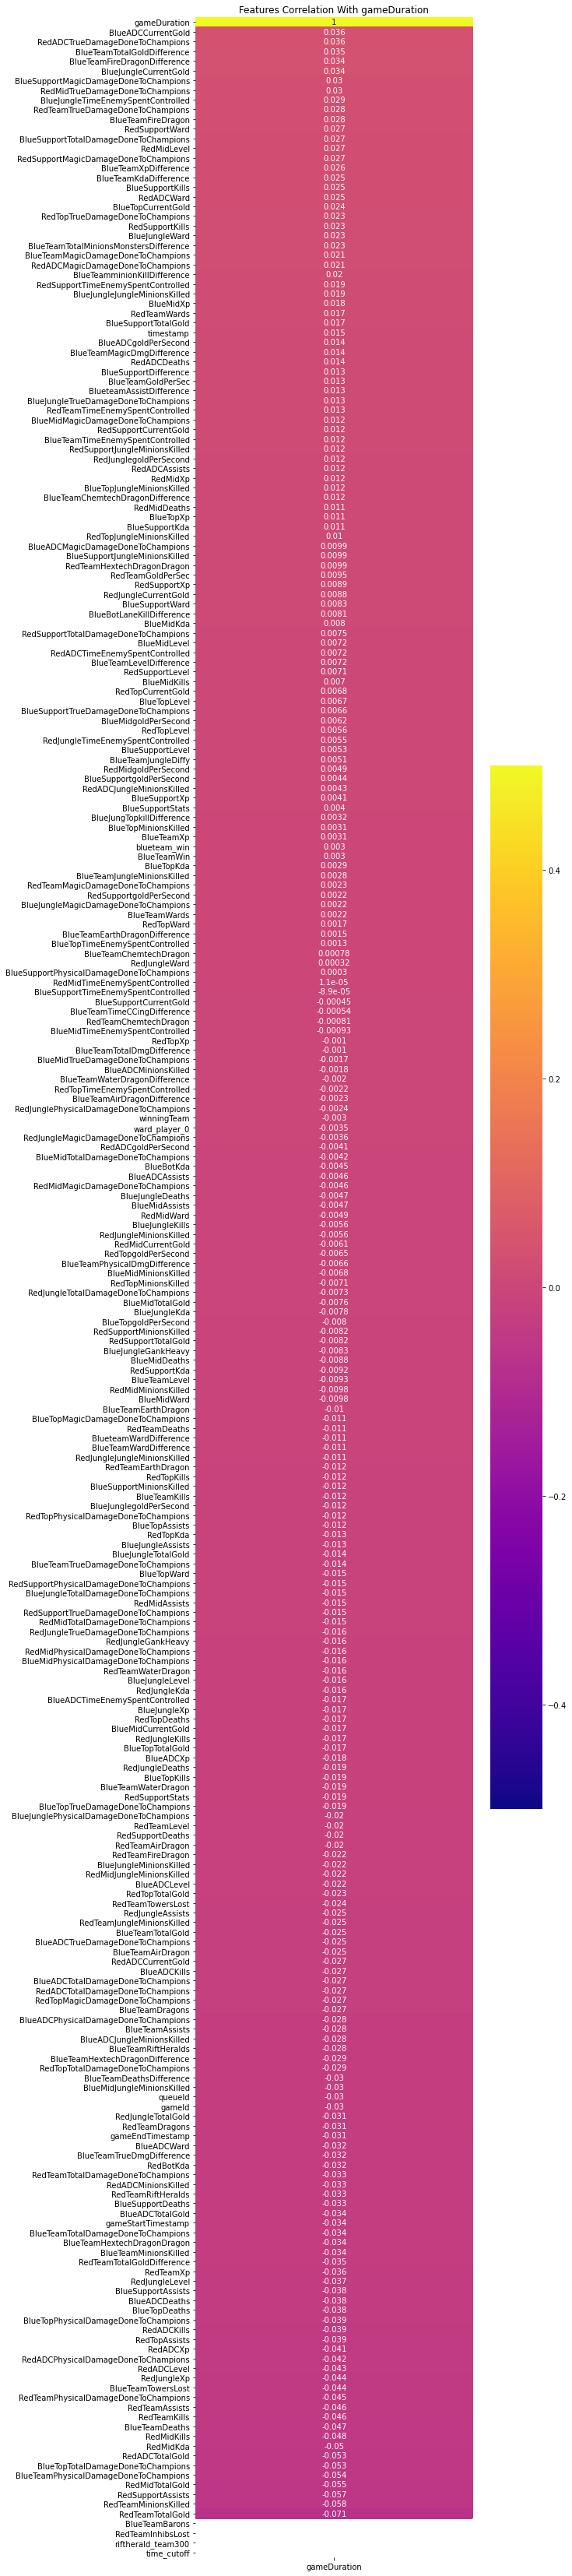

In [20]:
# game duration correlation for both teams
plt.figure(figsize = (8,60))
heatmap = sns.heatmap(train.corr()[['gameDuration']].sort_values(by = 'gameDuration',ascending = False),vmin = -.5,vmax = .5,annot = True, cmap = 'plasma')
heatmap.set_title('Features Correlation With gameDuration')

Text(0.5, 1.0, 'Features Correlation With Blue Team Winning')

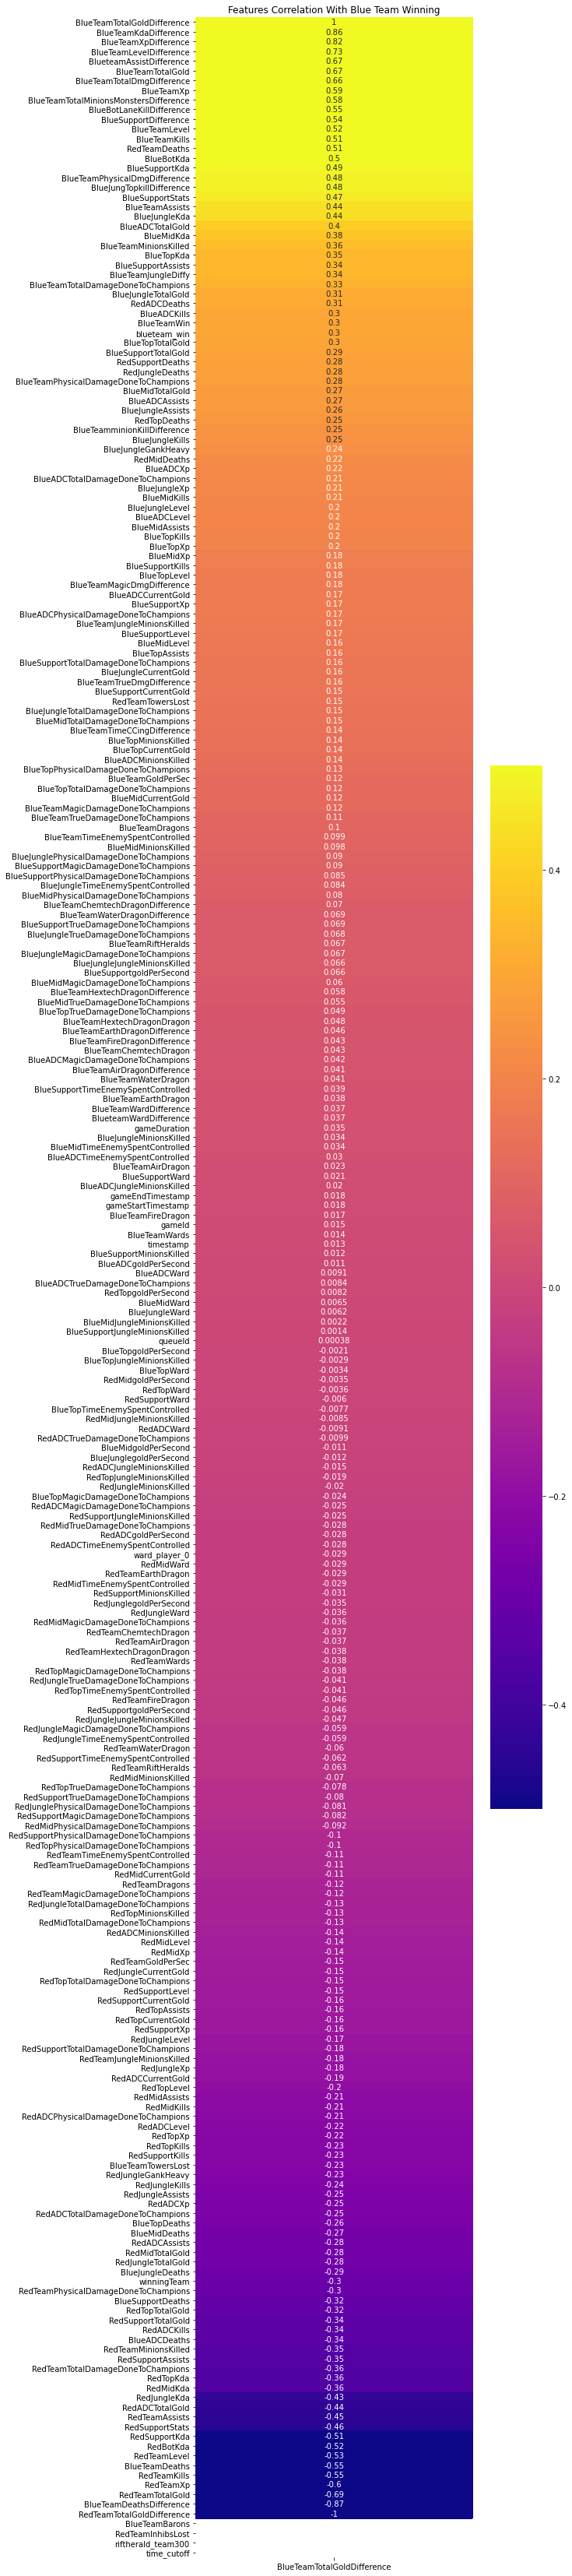

In [21]:
# blue team gold difference correlation
plt.figure(figsize = (8,60))
heatmap = sns.heatmap(train.corr()[['BlueTeamTotalGoldDifference']].sort_values(by = 'BlueTeamTotalGoldDifference',ascending = False),vmin = -.5,vmax = .5,annot = True, cmap = 'plasma')
heatmap.set_title('Features Correlation With Blue Team Winning')

Text(0.5, 1.0, 'Features Correlation With Blue Team Winning')

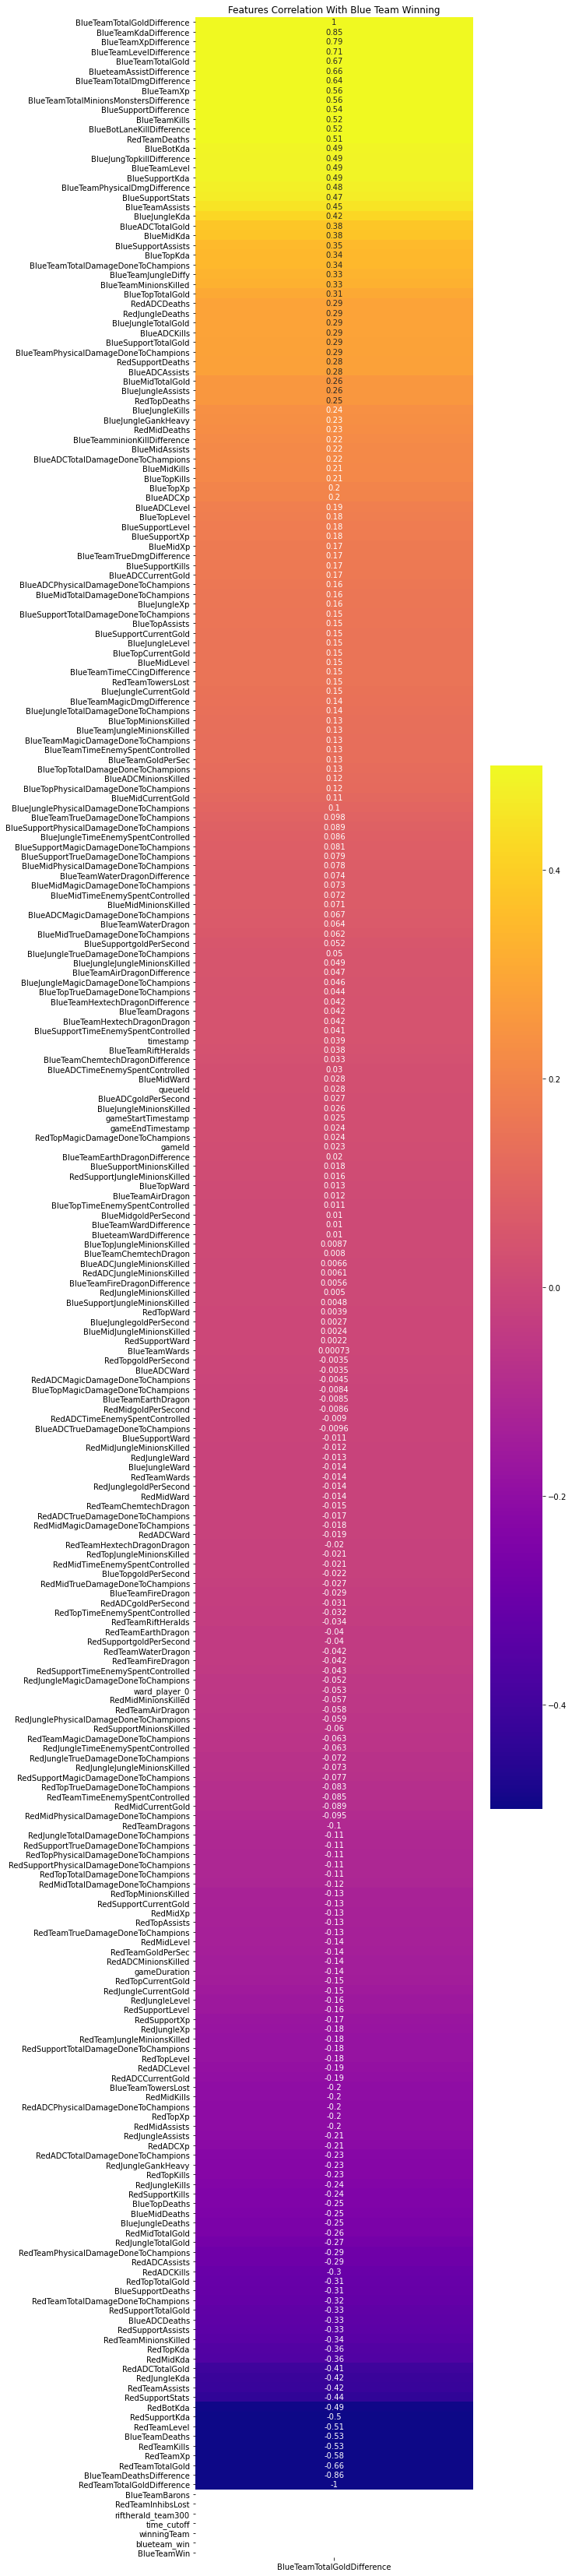

In [22]:

plt.figure(figsize = (8,60))
heatmap = sns.heatmap(btwin_train.corr()[['BlueTeamTotalGoldDifference']].sort_values(by = 'BlueTeamTotalGoldDifference',ascending = False),vmin = -.5,vmax = .5,annot = True, cmap = 'plasma')
heatmap.set_title('Features Correlation With Blue Team Winning')

Text(0.5, 1.0, 'Features Correlation With Blue Team Winning')

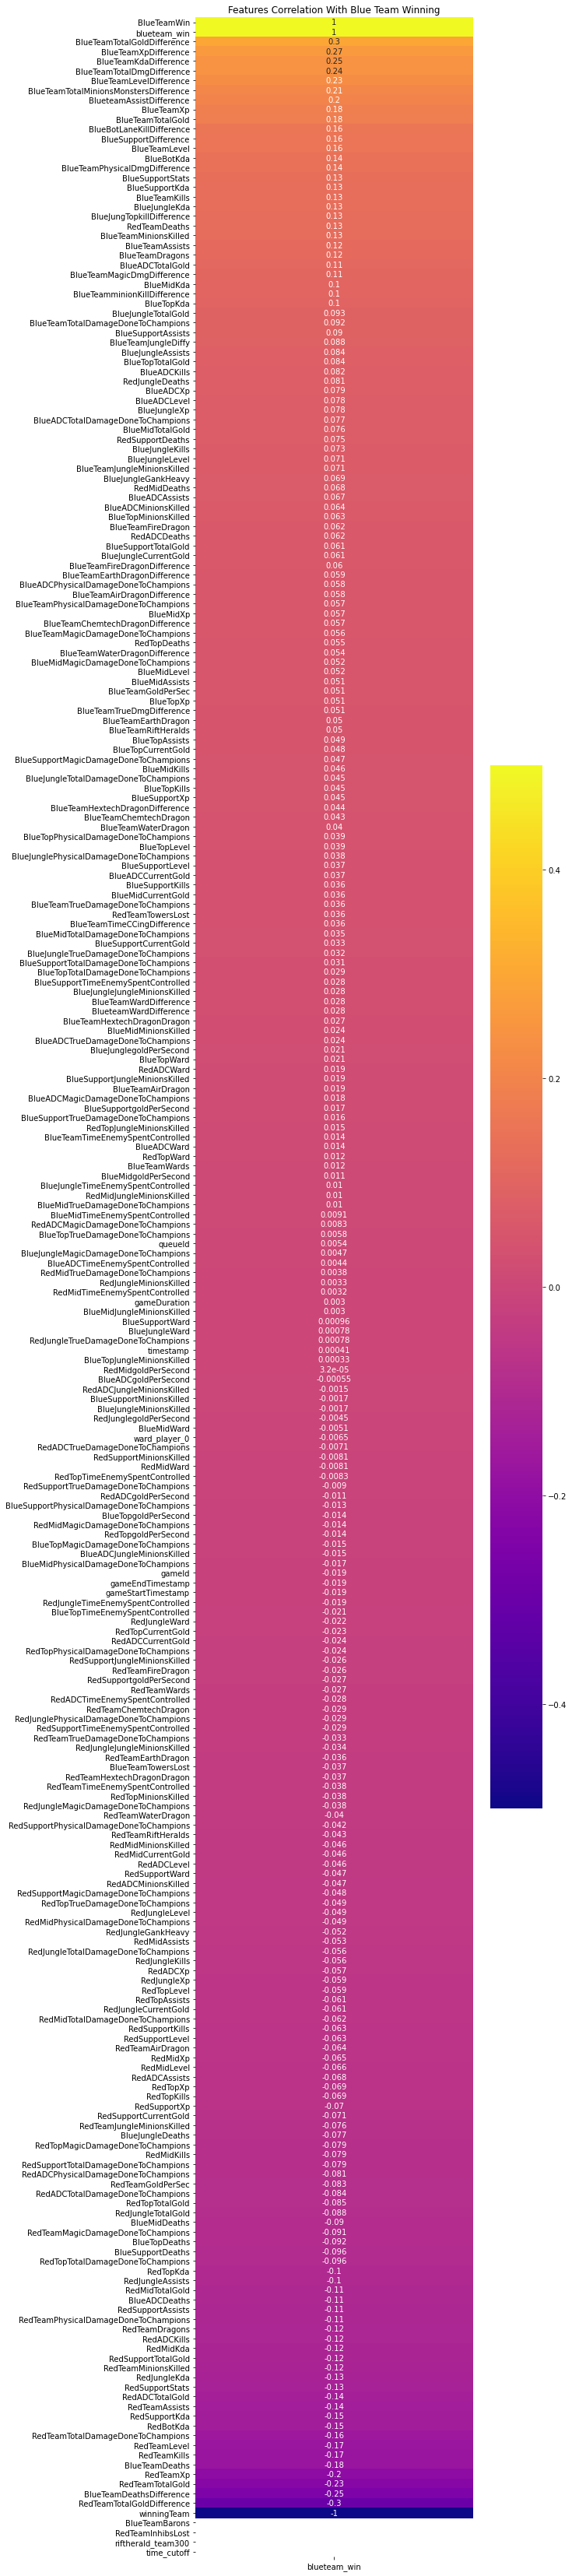

In [23]:
plt.figure(figsize = (8,60))
heatmap = sns.heatmap(train.corr()[['blueteam_win']].sort_values(by = 'blueteam_win',ascending = False),vmin = -.5,vmax = .5,annot = True, cmap = 'plasma')
heatmap.set_title('Features Correlation With Blue Team Winning')

In [24]:
train

BlueTeamAirDragon  BlueTopAssists  RedSupportAssists  BlueJungleAssists  \
3513                0.0             1.0                0.0                1.0   
1250                0.0             1.0                0.0                0.0   
3532                0.0             1.0                1.0                1.0   
3858                0.0             1.0                6.0                3.0   
528                 0.0             1.0                2.0                2.0   
...                 ...             ...                ...                ...   
1593                0.0             3.0                2.0                1.0   
4060                0.0             2.0                5.0                1.0   
1346                0.0             2.0                2.0                2.0   
3454                0.0             0.0                0.0                1.0   
3582                0.0             0.0                1.0                1.0   

      BlueMidAssists  BlueADCAssists  BlueSupportAssists  RedTopAssists  \
3513             1.0             4.0                 2.0            1.0   
1250             3.0             0.0                 5.0            0.0   
3532             0.0             1.0                 2.0            1.0   
3858             1.0             0.0                 4.0            1.0   
528              2.0             3.0                 2.0            0.0   
...              ...             ...                 ...            ...   
1593             0.0             1.0                 5.0            0.0   
4060             0.0             1.0                 1.0            0.0   
1346             0.0             2.0                 2.0            4.0   
3454             0.0             2.0                 3.0            0.0   
3582             0.0             2.0                 2.0            1.0   

      RedJungleAssists  RedMidAssists  RedADCAssists  BlueTeamBarons  \
3513               0.0            0.0            1.0             0.0   
1250               3.0            0.0            2.0             0.0   
3532               1.0            0.0            0.0             0.0   
3858               0.0            0.0            4.0             0.0   
528                2.0            1.0            2.0             0.0   
...                ...            ...            ...             ...   
1593               2.0            1.0            2.0             0.0   
4060               6.0            2.0            0.0             0.0   
1346               0.0            2.0            1.0             0.0   
3454               1.0            0.0            2.0             0.0   
3582               0.0            2.0            1.0             0.0   

      BlueTeamChemtechDragon  BlueTopCurrentGold  RedSupportCurrentGold  \
3513                     0.0              1109.0                  209.0   
1250                     0.0               323.0                  537.0   
3532                     0.0              1863.0                  483.0   
3858                     0.0               251.0                  402.0   
528                      0.0               934.0                  353.0   
...                      ...                 ...                    ...   
1593                     0.0               410.0                  329.0   
4060                     0.0              1035.0                   55.0   
1346                     0.0               353.0                  118.0   
3454                     0.0               553.0                   48.0   
3582                     0.0               377.0                   52.0   

      BlueJungleCurrentGold  BlueMidCurrentGold  BlueADCCurrentGold  \
3513                 1601.0               249.0               725.0   
1250                 1160.0               242.0                96.0   
3532                   41.0               785.0               586.0   
3858                   39.0               142.0               621.0   
528        